In [93]:
from pynq import Overlay
ol = Overlay("nn_reset.bit")

In [94]:
ol.example_0.register_map


RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  img_1 = Register(img=0),
  img_2 = Register(img=0),
  lrsw0_1 = Register(lrsw0=0),
  lrsw0_2 = Register(lrsw0=0),
  lrsb0_1 = Register(lrsb0=0),
  lrsb0_2 = Register(lrsb0=0),
  lrsw2_1 = Register(lrsw2=0),
  lrsw2_2 = Register(lrsw2=0),
  lrsb2_1 = Register(lrsb2=0),
  lrsb2_2 = Register(lrsb2=0),
  lrsw4_1 = Register(lrsw4=0),
  lrsw4_2 = Register(lrsw4=0),
  lrsb4_1 = Register(lrsb4=0),
  lrsb4_2 = Register(lrsb4=0),
  outcome_1 = Register(outcome=0),
  outcome_2 = Register(outcome=0),
  lrsb0_out_1 = Register(lrsb0_out=0),
  lrsb0_out_2 = Register(lrsb0_out=0),
  lrsb2_out_1 = Register(lrsb2_out=0),
  lrsb2_out_2 = Register(lrsb2_out=0),
  lrsw0_len = Register(

In [95]:
from pynq import allocate
import numpy as np 

In [96]:
my_ip=ol.example_0
r_map=my_ip.register_map

In [97]:
lrsw0_size =50176
lrsb0_size =64
lrsw2_size= 2048
lrsb2_size= 32
lrsw4_size =320
lrsb4_size= 10

In [98]:
r_map.img_len=784

r_map.lrsw0_len=lrsw0_size
r_map.lrsb0_len=lrsb0_size

r_map.lrsw2_len=lrsw2_size
r_map.lrsb2_len=lrsb2_size

r_map.lrsw4_len=lrsw4_size
r_map.lrsb4_len=lrsb4_size

r_map.outcome_len=10

In [99]:
lrsw0_buffer=allocate(shape=(lrsw0_size,), dtype=np.float32)
lrsb0_buffer=allocate(shape=(lrsb0_size,), dtype=np.float32)
lrsw2_buffer=allocate(shape=(lrsw2_size,), dtype=np.float32)
lrsb2_buffer=allocate(shape=(lrsb2_size,), dtype=np.float32)
lrsw4_buffer=allocate(shape=(lrsw4_size,), dtype=np.float32)
lrsb4_buffer=allocate(shape=(lrsb4_size,), dtype=np.float32)
img_buffer=allocate(shape=(784,), dtype=np.float32)

outcome_buffer=allocate(shape=(10,), dtype=np.float32)

lrsb0_out_buffer=allocate(shape=(10,), dtype=np.float32)
lrsb2_out_buffer=allocate(shape=(10,), dtype=np.float32)

In [100]:
lrsw0_buffer[:]=np.load("lrsw0.npy")
lrsb0_buffer[:]=np.load("lrsb0.npy")

lrsw2_buffer[:]=np.load("lrsw2.npy")
lrsb2_buffer[:]=np.load("lrsb2.npy")

lrsw4_buffer[:]=np.load("lrsw4.npy")
lrsb4_buffer[:]=np.load("lrsb4.npy")

img_lib=np.load("img.npy")
lable_lib=np.load("label.npy")

In [101]:
r_map.img_1=img_buffer.physical_address

r_map.lrsw0_1=lrsw0_buffer.physical_address
r_map.lrsb0_1=lrsb0_buffer.physical_address

r_map.lrsw2_1=lrsw2_buffer.physical_address
r_map.lrsb2_1=lrsb2_buffer.physical_address

r_map.lrsw4_1=lrsw4_buffer.physical_address
r_map.lrsb4_1=lrsb4_buffer.physical_address

r_map.outcome_1=outcome_buffer.physical_address
r_map.lrsb0_out_1=lrsb0_out_buffer.physical_address
r_map.lrsb2_out_1=lrsb2_out_buffer.physical_address

In [113]:
import time

In [126]:
start_time=time.time()
hit=0
for i in range(1000):
    img_buffer[:]=img_lib[i]
    ans=lable_lib[i]
    my_ip.register_map.CTRL.AP_START=1
    while(ol.example_0.register_map.CTRL.AP_DONE==0):
        pass
    if(ans==outcome_buffer.argmax()):
        hit=hit+1
    #print("i:",i+1,"acc",hit/1000)
end_time=time.time()
print(end_time-start_time)
print(hit/1000)

12.220770597457886
0.968


1000img 12.136330366134644s to finish

In [82]:
import matplotlib.pyplot as plt



2.0


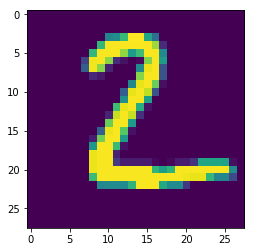

In [13]:
plt.imshow(img_lib[1].reshape((28,28)))
print(lable_lib[1])

In [110]:
lrsw0=np.load("lrsw0.npy")
lrsb0=np.load("lrsb0.npy")

lrsw2=np.load("lrsw2.npy")
lrsb2=np.load("lrsb2.npy")

lrsw4=np.load("lrsw4.npy")
lrsb4=np.load("lrsb4.npy")

In [125]:
start_time=time.time()
hit=0
for r in range(10):
    img=img_lib[r]
    label=lable_lib[r]
    img=img.reshape(-1)
    out1=np.zeros(lrsb0_size)
    out2=np.zeros(lrsb2_size)
    out3=np.zeros(lrsb4_size)
    
    for i in range(lrsb0_size):
        for j in range(784):
            out1[i]+=lrsw0[i*784+j]*img[j]
        out1[i]+=lrsb0[i]
    for i in range(lrsb0_size):
        if(out1[i]<0):
            out1[i]=0

    for i in range(lrsb2_size):
        for j in range(lrsb0_size):
            out2[i]+=lrsw2[i*lrsb0_size+j]*out1[j]
        out2[i]+=lrsb2[i]
    for i in range(lrsb2_size):
        if(out2[i]<0):
            out2[i]=0

    for i in range(lrsb4_size):
        for j in range(lrsb2_size):
            out3[i]+=lrsw4[i*lrsb2_size+j]*out2[j]
        out3[i]+=lrsb4[i]
    if(out3.argmax()==label):
        hit+=1

    print("now:",r+1,"hit:",hit)
print(hit)
print(time.time()-start_time)

now: 1 hit: 1
now: 2 hit: 2
now: 3 hit: 3
now: 4 hit: 4
now: 5 hit: 5
now: 6 hit: 6
now: 7 hit: 7
now: 8 hit: 8
now: 9 hit: 9
now: 10 hit: 10
10
39.0618462562561
